10.0 12


NameError: name 'loglog' is not defined

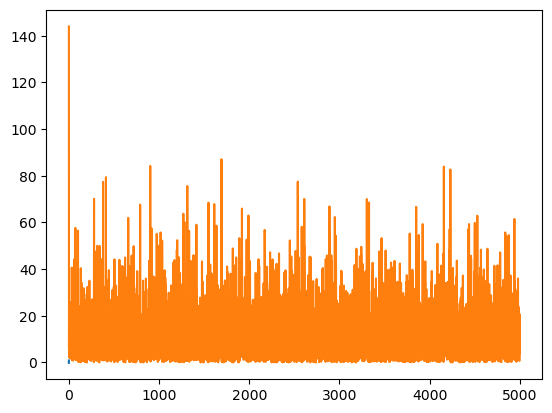

In [2]:

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
    
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate    



from thinkdsp import Noise

class UncorrelatedPoissonNoise(Noise):
    """Represents uncorrelated Poisson noise."""

    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        ys = np.random.poisson(self.amp, len(ts))
        return ys
    

amp = 0.001
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

expected = amp * framerate * duration
actual = sum(wave.ys)
print(expected, actual)

wave.plot()

spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

spectrum.estimate_slope().slope

amp = 1
framerate = 10000
duration = 1

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

wave.plot()

import matplotlib.pyplot as plt

def normal_prob_plot(sample, fit_color='0.8', **options):
    """Makes a normal probability plot with a fitted line.

    sample: sequence of numbers
    fit_color: color string for the fitted line
    options: passed along to Plot
    """
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    ys = np.sort(sample)
    
    mean, std = np.mean(sample), np.std(sample)
    fit_ys = mean + std * xs
    plt.plot(xs, fit_ys, color='gray', alpha=0.5, label='model')

    plt.plot(xs, ys, **options)
    
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0

normal_prob_plot(spectrum.real, label='real')
decorate(xlabel='Normal sample',
        ylabel='Power')

normal_prob_plot(spectrum.imag, label='imag', color='C1')
decorate(xlabel='Normal sample')